## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp
import sympy             as sm

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

## 데이터 불러오기

In [3]:
#몇차 데이터인지
testcase = "test5"

#### input temp

In [4]:
if testcase[-1] == "1" or "2":
    input_temp = pd.read_csv('./input-'+testcase+'.csv',skiprows = 6).iloc[1:,:-1]
else:
    input_temp = pd.read_csv('./input-'+testcase+'.csv',skiprows = 6).iloc[1:,:]
input_temp

,Name,P1,P2,P3,P4,P5
1,DP 1,80,80.2,105.4,103.8,114.2
2,DP 2,80,80.6,83.8,97.0,105.8
3,DP 3,80,81.0,93.8,115.0,118.6
4,DP 4,80,81.4,107.8,87.4,98.6
5,DP 5,80,81.8,85.4,107.8,97.0
...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0
97,DP 97,80,118.6,109.8,80.6,109.8
98,DP 98,80,119.0,104.6,109.8,111.0
99,DP 99,80,119.4,80.6,100.2,119.4


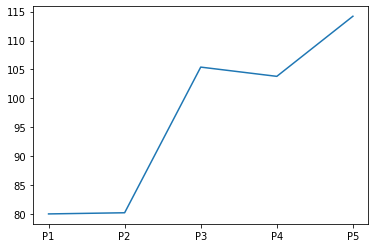

In [5]:
plt.plot(input_temp.iloc[0,1:])

#### preform temp

In [6]:
kelvin_list =['1','2']
for i in range(100):
    temp_temp = pd.read_csv('./'+testcase+'/dp%d-preform-temp.csv'%(i+1),skiprows = 4)
    if  testcase[-1] in kelvin_list:
        temp_temp.iloc[:,1] = temp_temp.iloc[:,1]-273.15
    s = "dp%d_preform_temp = temp_temp"%(i+1); exec(s)
dp1_preform_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
0,0.000000,110.674400
1,0.000965,110.674400
2,0.001931,110.674400
3,0.002889,110.674400
4,0.003837,110.674400
5,0.004780,110.674400
6,0.005883,110.547905
7,0.006988,110.173637
8,0.007967,109.737999
9,0.008953,109.298943


In [7]:
backward_list = ['1','2','4','5']
kelvin_list =['1','2']
for i in range(100):
    temp_temp = pd.read_csv('./'+testcase+'/dp%d-preform-temp.csv'%(i+1),skiprows = 4)
    if testcase[-1] in backward_list:
        temp_temp.iloc[:,0] = temp_temp.iloc[-1,0]-temp_temp.iloc[:,0]
        temp_temp = temp_temp[::-1]
        
    if  testcase[-1] in kelvin_list:
        temp_temp.iloc[:,1] = temp_temp.iloc[:,1]-273.15
        
    s = "dp%d_preform_temp = temp_temp"%(i+1); exec(s)

In [8]:
dp1_preform_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
34,0.000000,79.999992
33,0.000986,79.999992
32,0.001977,79.999992
31,0.003259,79.999992
30,0.004823,80.006828
29,0.006803,80.043541
28,0.009188,80.087791
27,0.011958,80.139152
26,0.014811,80.192070
25,0.017678,85.898918


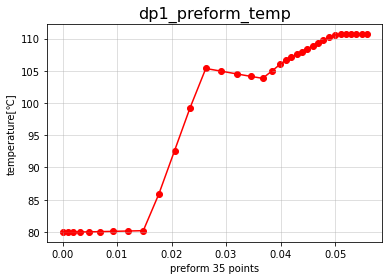

In [9]:
plt.title("dp1_preform_temp",fontsize = 16)
plt.grid(alpha = 0.5)
plt.xlabel('preform %d points'%(dp1_preform_temp.shape[0]))
plt.ylabel('temperature[℃]')
plt.plot(dp1_preform_temp.iloc[:,0],dp1_preform_temp.iloc[:,1],c = 'r')
plt.scatter(dp1_preform_temp.iloc[:,0],dp1_preform_temp.iloc[:,1],c = 'r')

### input_temp max/min/mean/rms/var/skewness/kurtosis

In [10]:
def rms(x):
    return np.sqrt(np.mean(x**2))

In [11]:
input_max_factor = []
input_min_factor = [] 
input_mean_factor = []
input_rms_factor = []
input_var_factor = []
input_skewness_factor = []
input_kurtosis_factor = []

for i in range(100):
    input_max_factor = np.append(input_max_factor,np.max(input_temp.iloc[i,1:]))
    input_min_factor = np.append(input_min_factor,np.min(input_temp.iloc[i,1:]))
    input_mean_factor = np.append(input_mean_factor,np.mean(input_temp.iloc[i,1:]))
    input_rms_factor = np.append(input_rms_factor,rms(input_temp.iloc[i,1:]))
    input_var_factor = np.append(input_var_factor,np.var(input_temp.iloc[i,1:]))
    input_skewness_factor = np.append(input_skewness_factor,sp.skew(input_temp.iloc[i,1:]))
    input_kurtosis_factor = np.append(input_kurtosis_factor,sp.kurtosis(input_temp.iloc[i,1:]))
pd.DataFrame(input_max_factor)

,0
0,114.2
1,105.8
2,118.6
3,107.8
4,107.8
...,...
95,118.2
96,118.6
97,119.0
98,119.4


### input_temp 온도변화 평균값

In [12]:
input_diff_factor = []
for i in range(100):
    diff_val = 0
    for j in range(input_temp.shape[1]-2):
        diff = np.abs(input_temp.iloc[i,j+2]-input_temp.iloc[i,j+1])
        diff_val = diff_val+diff
    input_diff_factor = np.append(input_diff_factor,diff_val/(input_temp.shape[1]-2))
pd.DataFrame(input_diff_factor)

,0
0,9.35
1,6.45
2,9.65
3,14.85
4,9.65
...,...
95,14.25
96,26.45
97,14.95
98,29.25


### preform_temp 특징값들

In [13]:
dp1_preform_temp

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
34,0.000000,79.999992
33,0.000986,79.999992
32,0.001977,79.999992
31,0.003259,79.999992
30,0.004823,80.006828
29,0.006803,80.043541
28,0.009188,80.087791
27,0.011958,80.139152
26,0.014811,80.192070
25,0.017678,85.898918


In [14]:
preform_max_factor = []
preform_min_factor = []
preform_mean_factor = []
preform_rms_factor = []
preform_var_factor = []
preform_skewness_factor = []
preform_kurtosis_factor = []

for i in range(100):
    exec("temp_preform_temp = dp%d_preform_temp"%(i+1))
    preform_max_factor = np.append(preform_max_factor,np.max(temp_preform_temp.iloc[:,1]))
    preform_min_factor = np.append(preform_min_factor,np.min(temp_preform_temp.iloc[:,1]))
    preform_mean_factor = np.append(preform_mean_factor,np.mean(temp_preform_temp.iloc[:,1]))
    preform_rms_factor = np.append(preform_rms_factor,rms(temp_preform_temp.iloc[:,1]))
    preform_var_factor = np.append(preform_var_factor,np.var(temp_preform_temp.iloc[:,1]))
    preform_skewness_factor = np.append(preform_skewness_factor,sp.skew(temp_preform_temp.iloc[:,1]))
    preform_kurtosis_factor = np.append(preform_kurtosis_factor,sp.kurtosis(temp_preform_temp.iloc[:,1]))
pd.DataFrame(preform_skewness_factor)

,0
0,-0.759851
1,-0.309008
2,-0.506498
3,-0.053468
4,-0.410546
...,...
95,-1.503252
96,0.308301
97,-1.529282
98,-0.654274


In [15]:
pd.DataFrame(input_skewness_factor)

,0
0,-0.205375
1,0.577993
2,0.187338
3,0.473172
4,0.630228
...,...
95,-1.296107
96,-0.283415
97,-1.048004
98,-0.012402


In [16]:
preform_diff_factor = []
for i in range(100):
    exec("temp_preform_temp = dp%d_preform_temp"%(i+1))
    diff_val = 0
    for j in range(temp_preform_temp.shape[0]-1):
        x_diff = np.abs(temp_preform_temp.iloc[j+1,0]-temp_preform_temp.iloc[j,0])
        temp_diff = np.abs(temp_preform_temp.iloc[j+1,1]-temp_preform_temp.iloc[j,1])
        diff = temp_diff/x_diff
        
        diff_val = diff_val+diff
        
    preform_diff_factor = np.append(preform_diff_factor,diff_val)
pd.DataFrame(preform_diff_factor)

,0
0,15433.593018
1,11533.840603
2,15122.804922
3,23326.173634
4,16375.126178
...,...
95,21290.539315
96,45188.727502
97,22409.979642
98,46782.730057


In [17]:
factor_table = pd.DataFrame((np.zeros((100,17))),columns = ["case","input_max","input_min","input_mean","input_rms",
                                            "input_var","input_skew","input_kurto","input_diff",
                                            "pre_max","pre_min","pre_mean","pre_rms",
                                            "pre_var","pre_skew","pre_kurto","pre_diff"])

In [18]:
for i in range(100):
    exec("factor_table.iloc[i,0] = 't%s_dp%d'"%(testcase[-1],i+1))
    factor_table.iloc[:,1] = input_max_factor 
    factor_table.iloc[:,2] = input_min_factor 
    factor_table.iloc[:,3] = input_mean_factor 
    factor_table.iloc[:,4] = input_rms_factor 

    factor_table.iloc[:,5] = input_var_factor 
    factor_table.iloc[:,6] = input_skewness_factor 
    factor_table.iloc[:,7] = input_kurtosis_factor 
    factor_table.iloc[:,8] = input_diff_factor 

    factor_table.iloc[:,9] = preform_max_factor 
    factor_table.iloc[:,10] = preform_min_factor 
    factor_table.iloc[:,11] = preform_mean_factor 
    factor_table.iloc[:,12] = preform_rms_factor 

    factor_table.iloc[:,13] = preform_var_factor 
    factor_table.iloc[:,14] = preform_skewness_factor 
    factor_table.iloc[:,15] = preform_kurtosis_factor 
    factor_table.iloc[:,16] = preform_diff_factor  

In [19]:
factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t5_dp1,114.2,80.0,96.72,97.731551,196.6976,-0.205375,-1.686051,9.35,110.674400,79.999992,99.499275,100.276987,155.368428,-0.759851,-1.223329,15433.593018
1,t5_dp2,105.8,80.0,89.44,90.023819,104.7744,0.577993,-1.360989,6.45,102.816795,79.999992,92.752844,93.254626,93.335195,-0.309008,-1.725169,11533.840603
2,t5_dp3,118.6,80.0,97.68,99.045848,268.6976,0.187338,-1.734415,9.65,117.379601,79.999992,103.176936,104.433044,260.780487,-0.506498,-1.587100,15122.804922
3,t5_dp4,107.8,80.0,91.04,91.659719,113.2224,0.473172,-1.348795,14.85,107.312218,79.999992,90.433584,90.702748,48.755386,-0.053468,-0.457845,23326.173634
4,t5_dp5,107.8,80.0,90.40,91.010153,110.6880,0.630228,-1.182235,9.65,107.361168,79.999992,94.418803,94.970980,104.576598,-0.410546,-1.620276,16375.126178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t5_dp96,118.2,80.0,108.00,108.961498,208.6080,-1.296107,-0.070078,14.25,116.864403,79.999992,108.998967,109.788209,172.676029,-1.503252,0.544705,21290.539315
96,t5_dp97,118.6,80.0,99.76,101.068690,262.8224,-0.283415,-1.744761,26.45,117.067162,79.999992,95.358977,95.932977,109.801559,0.308301,-0.579416,45188.727502
97,t5_dp98,119.0,80.0,104.88,105.715846,176.0256,-1.048004,-0.257269,14.95,117.451286,79.999992,104.888152,105.471435,122.699070,-1.529282,0.752370,22409.979642
98,t5_dp99,119.4,80.0,99.92,101.438770,305.8176,-0.012402,-1.749469,29.25,117.835381,79.999992,101.235962,101.961897,147.508504,-0.654274,-1.039978,46782.730057


In [20]:
pd.DataFrame(factor_table).to_csv("./factor table/"+testcase+"_temp_factor_table.csv")

In [21]:
for i in range(5):
    exec('test%d_temp_factor_table = pd.read_csv("./factor table/test%d_temp_factor_table.csv",index_col = 0)'%(i+1,i+1))

In [22]:
test1_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t1_dp1,114.2,80.0,95.775,96.562493,151.464375,-0.158555,-1.455239,12.542857,114.108728,79.999994,97.261846,97.685423,82.575197,-0.628601,-0.481771,29341.838770
1,t1_dp2,113.4,80.0,91.075,91.857689,143.179375,0.782219,-0.960372,14.885714,113.337885,79.999994,90.353738,90.869391,93.448270,0.642425,-0.865616,34258.142699
2,t1_dp3,118.6,80.0,98.825,99.702533,174.214375,-0.011566,-1.144948,8.485714,118.568414,79.999994,99.382548,99.955100,114.131161,-0.131656,-0.465603,20604.020121
3,t1_dp4,108.2,80.0,92.875,93.441720,105.589375,0.365224,-1.293235,13.342857,106.891962,79.999994,92.985020,93.257205,50.692386,0.152505,-0.423377,28874.206087
4,t1_dp5,119.0,80.0,93.575,94.481083,170.394375,0.758236,-0.722031,15.457143,116.691675,79.999994,93.966796,94.450014,91.046402,0.464568,-0.417445,34031.899658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t1_dp96,118.2,80.0,102.925,103.931107,208.119375,-0.496690,-1.322656,13.057143,117.779901,80.000024,99.637848,100.562075,185.030324,-0.088584,-1.631338,30877.793861
96,t1_dp97,118.6,80.0,99.925,100.795213,174.669375,-0.353159,-1.191903,17.342857,118.230310,80.000024,99.641491,100.028812,77.336474,0.098750,-0.403344,40114.072329
97,t1_dp98,119.0,80.0,100.475,101.198790,145.969375,-0.141573,-1.052559,12.714286,118.395074,80.000024,100.307711,100.661400,71.080664,0.140721,-0.560378,30097.613864
98,t1_dp99,119.4,80.0,101.075,102.187059,226.039375,-0.214431,-1.470179,20.942857,119.231531,80.000024,100.061163,100.648379,117.859980,0.078060,-1.275398,48612.191072


In [23]:
test2_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t2_dp1,117.4,80.0,97.546667,98.269805,141.602489,-0.187683,-0.959899,11.528571,117.204553,80.000024,97.110389,97.536092,82.861429,-0.169593,-0.386156,74003.512114
1,t2_dp2,119.8,80.0,93.280000,94.228856,177.918933,0.694466,-1.031062,14.300000,115.387750,80.000024,97.895798,98.543051,127.145676,-0.238846,-1.516384,79695.880715
2,t2_dp3,113.4,80.0,94.880000,95.437547,106.110933,0.270572,-0.897572,12.557143,113.142511,79.999994,97.694362,98.193695,97.813522,0.106069,-1.285427,76093.550445
3,t2_dp4,112.2,80.0,92.026667,92.609776,107.663289,0.512936,-1.112578,12.842857,111.942438,79.999994,90.420514,90.774082,64.064708,0.966955,0.271520,66887.441799
4,t2_dp5,119.8,80.0,96.586667,97.530768,183.266489,0.402461,-1.263847,17.557143,119.174554,79.999994,99.971195,100.641962,134.564749,-0.347560,-1.021058,93338.291439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t2_dp96,118.2,80.0,97.360000,98.076514,140.033067,0.459348,-0.858385,15.328571,117.876184,79.999994,95.431874,95.797766,69.969482,0.644652,-0.040524,87694.464931
96,t2_dp97,118.6,80.0,102.933333,103.603320,138.376889,-0.406159,-1.093656,17.814286,118.188989,80.000024,102.194631,102.484735,59.378159,-0.216222,0.275459,95162.403418
97,t2_dp98,119.0,80.0,101.413333,102.137241,147.351822,-0.301715,-1.222024,11.100000,118.806940,80.000024,104.415195,104.936066,109.045022,-0.700910,-0.894933,61176.473806
98,t2_dp99,119.4,80.0,100.640000,101.201924,113.419733,0.291011,-0.626222,12.471429,119.262994,79.999994,102.295880,102.647446,72.051070,-0.414274,-0.098884,79425.776800


In [24]:
test3_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t3_dp1,114.2,80.0,95.775,96.562493,151.464375,-0.158555,-1.455239,12.542857,112.406670,79.999992,91.619947,92.000653,69.905481,0.704616,-0.147772,43364.984759
1,t3_dp2,113.4,80.0,91.075,91.857689,143.179375,0.782219,-0.960372,14.885714,112.244347,79.999992,97.427841,98.189876,149.067605,-0.285239,-1.657688,48002.900136
2,t3_dp3,118.6,80.0,98.825,99.702533,174.214375,-0.011566,-1.144948,8.485714,117.944206,79.999992,100.561275,101.061765,100.910410,-0.970335,0.070289,31912.777746
3,t3_dp4,108.2,80.0,92.875,93.441720,105.589375,0.365224,-1.293235,13.342857,107.317192,79.999992,98.055010,98.490700,85.633125,-0.755327,-0.738054,49308.404424
4,t3_dp5,119.0,80.0,93.575,94.481083,170.394375,0.758236,-0.722031,15.457143,117.442101,79.999992,91.201909,91.545333,62.759889,1.093617,1.395121,45077.245288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t3_dp96,118.2,80.0,102.925,103.931107,208.119375,-0.496690,-1.322656,13.057143,119.400017,79.999992,108.059319,108.766128,153.254107,-0.750714,-0.810134,92856.805408
96,t3_dp97,118.6,80.0,99.925,100.795213,174.669375,-0.353159,-1.191903,17.342857,118.599998,79.999992,107.503720,108.088711,126.119744,-0.659890,-0.621230,82873.732655
97,t3_dp98,119.0,80.0,100.475,101.198790,145.969375,-0.141573,-1.052559,12.714286,117.671074,79.999992,91.283914,91.986078,128.685691,0.710687,-0.801593,61794.355752
98,t3_dp99,119.4,80.0,101.075,102.187059,226.039375,-0.214431,-1.470179,20.942857,118.154625,79.999992,97.408589,97.775735,71.661061,0.733780,0.117700,70057.972254


In [25]:
test4_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t4_dp1,114.2,80.0,95.775,96.562493,151.464375,-0.158555,-1.455239,12.542857,113.073448,79.999992,93.498756,93.880684,71.565474,0.535592,-0.492378,40301.511235
1,t4_dp2,113.4,80.0,91.075,91.857689,143.179375,0.782219,-0.960372,14.885714,113.199089,79.999992,97.522397,98.175743,127.858579,-0.293625,-1.522637,47671.335801
2,t4_dp3,118.6,80.0,98.825,99.702533,174.214375,-0.011566,-1.144948,8.485714,117.807213,79.999992,101.834812,102.237196,82.115445,-0.992733,0.897479,30337.366952
3,t4_dp4,108.2,80.0,92.875,93.441720,105.589375,0.365224,-1.293235,13.342857,107.512627,79.999992,98.390520,98.720608,65.063952,-0.777745,-0.352374,47228.114279
4,t4_dp5,119.0,80.0,93.575,94.481083,170.394375,0.758236,-0.722031,15.457143,114.916710,79.999992,92.349173,92.687996,62.694891,0.983301,0.870053,41150.118299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t4_dp96,118.2,80.0,102.925,103.931107,208.119375,-0.496690,-1.322656,13.057143,119.399986,80.000023,107.870498,108.474791,130.735938,-0.795449,-0.550775,72872.040296
96,t4_dp97,118.6,80.0,99.925,100.795213,174.669375,-0.353159,-1.191903,17.342857,118.599998,80.000023,107.022931,107.529648,108.717612,-0.646813,-0.384260,65536.877631
97,t4_dp98,119.0,80.0,100.475,101.198790,145.969375,-0.141573,-1.052559,12.714286,117.649529,80.000023,92.750308,93.449895,130.263296,0.543492,-1.048148,44323.316531
98,t4_dp99,119.4,80.0,101.075,102.187059,226.039375,-0.214431,-1.470179,20.942857,118.617668,80.000023,98.074891,98.483407,80.297148,0.603509,-0.299251,53026.731248


In [26]:
test5_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t5_dp1,114.2,80.0,96.72,97.731551,196.6976,-0.205375,-1.686051,9.35,110.674400,79.999992,99.499275,100.276987,155.368428,-0.759851,-1.223329,15433.593018
1,t5_dp2,105.8,80.0,89.44,90.023819,104.7744,0.577993,-1.360989,6.45,102.816795,79.999992,92.752844,93.254626,93.335195,-0.309008,-1.725169,11533.840603
2,t5_dp3,118.6,80.0,97.68,99.045848,268.6976,0.187338,-1.734415,9.65,117.379601,79.999992,103.176936,104.433044,260.780487,-0.506498,-1.587100,15122.804922
3,t5_dp4,107.8,80.0,91.04,91.659719,113.2224,0.473172,-1.348795,14.85,107.312218,79.999992,90.433584,90.702748,48.755386,-0.053468,-0.457845,23326.173634
4,t5_dp5,107.8,80.0,90.40,91.010153,110.6880,0.630228,-1.182235,9.65,107.361168,79.999992,94.418803,94.970980,104.576598,-0.410546,-1.620276,16375.126178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,t5_dp96,118.2,80.0,108.00,108.961498,208.6080,-1.296107,-0.070078,14.25,116.864403,79.999992,108.998967,109.788209,172.676029,-1.503252,0.544705,21290.539315
96,t5_dp97,118.6,80.0,99.76,101.068690,262.8224,-0.283415,-1.744761,26.45,117.067162,79.999992,95.358977,95.932977,109.801559,0.308301,-0.579416,45188.727502
97,t5_dp98,119.0,80.0,104.88,105.715846,176.0256,-1.048004,-0.257269,14.95,117.451286,79.999992,104.888152,105.471435,122.699070,-1.529282,0.752370,22409.979642
98,t5_dp99,119.4,80.0,99.92,101.438770,305.8176,-0.012402,-1.749469,29.25,117.835381,79.999992,101.235962,101.961897,147.508504,-0.654274,-1.039978,46782.730057


In [28]:
total_temp_factor_table = pd.DataFrame((np.zeros((500,17))),columns = ["case","input_max","input_min","input_mean","input_rms",
                                            "input_var","input_skew","input_kurto","input_diff",
                                            "pre_max","pre_min","pre_mean","pre_rms",
                                            "pre_var","pre_skew","pre_kurto","pre_diff"])
for i in range(5):
    exec("temp_temp_factor_table = test%d_temp_factor_table"%(i+1))
    
    for j in range (100):
        total_temp_factor_table.iloc[100*i+j,:] = temp_temp_factor_table.iloc[j,:]
    

In [29]:
total_temp_factor_table

,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,t1_dp1,114.2,80.0,95.775,96.562493,151.464375,-0.158555,-1.455239,12.542857,114.108728,79.999994,97.261846,97.685423,82.575197,-0.628601,-0.481771,29341.838770
1,t1_dp2,113.4,80.0,91.075,91.857689,143.179375,0.782219,-0.960372,14.885714,113.337885,79.999994,90.353738,90.869391,93.448270,0.642425,-0.865616,34258.142699
2,t1_dp3,118.6,80.0,98.825,99.702533,174.214375,-0.011566,-1.144948,8.485714,118.568414,79.999994,99.382548,99.955100,114.131161,-0.131656,-0.465603,20604.020121
3,t1_dp4,108.2,80.0,92.875,93.441720,105.589375,0.365224,-1.293235,13.342857,106.891962,79.999994,92.985020,93.257205,50.692386,0.152505,-0.423377,28874.206087
4,t1_dp5,119.0,80.0,93.575,94.481083,170.394375,0.758236,-0.722031,15.457143,116.691675,79.999994,93.966796,94.450014,91.046402,0.464568,-0.417445,34031.899658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,t5_dp96,118.2,80.0,108.000,108.961498,208.608000,-1.296107,-0.070078,14.250000,116.864403,79.999992,108.998967,109.788209,172.676029,-1.503252,0.544705,21290.539315
496,t5_dp97,118.6,80.0,99.760,101.068690,262.822400,-0.283415,-1.744761,26.450000,117.067162,79.999992,95.358977,95.932977,109.801559,0.308301,-0.579416,45188.727502
497,t5_dp98,119.0,80.0,104.880,105.715846,176.025600,-1.048004,-0.257269,14.950000,117.451286,79.999992,104.888152,105.471435,122.699070,-1.529282,0.752370,22409.979642
498,t5_dp99,119.4,80.0,99.920,101.438770,305.817600,-0.012402,-1.749469,29.250000,117.835381,79.999992,101.235962,101.961897,147.508504,-0.654274,-1.039978,46782.730057


In [30]:
pd.DataFrame(total_temp_factor_table).to_csv("./factor table/total_temp_factor_table.csv")